In [1]:
import numpy as np 
import pandas as pd

In [2]:
#dataset does not contain some utf-8 characters thats y using latin or ISO-8859-1. 
maindf = pd.read_csv('spam.csv', encoding='latin-1') 
maindf.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
print(maindf.shape)

(5572, 5)


In [4]:
# 1. Data cleaning 
# 2. EDA
# 3. Text Preprocessing
# 4. Model building 
# 5. Evaluation of model 
# 6. Improvement 
# 7. Website
# 8. Deploy

## 1. Data cleaning 

In [5]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# many null values and column arent so much imp so just dropping 
maindf.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
maindf.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# column names arent descriptive so renmaing them 
maindf.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
maindf.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# since we are going to classify thats y encoding the string to number using labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
maindf['target'] = encoder.fit_transform(maindf['target'])
maindf.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# checking if there are any null values in the column 
maindf.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# checking for duplicated values 
print('Duplicated values= ',maindf.duplicated().sum())

# since there are duplicated values we are going to drop them 
maindf = maindf.drop_duplicates(keep='first')
print('Duplicated values= ',maindf.duplicated().sum())


Duplicated values=  403
Duplicated values=  0


# EDA

In [12]:
maindf['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

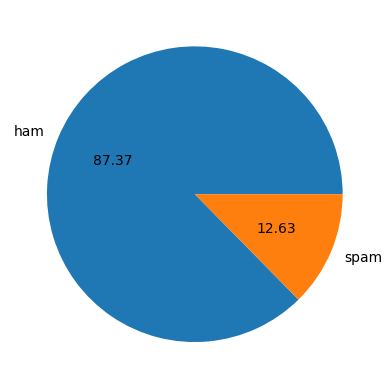

In [13]:
import matplotlib.pyplot as plt
plt.pie(maindf['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f") # autopct is to view how many num u want after decimal
plt.show()

In [14]:
import nltk


In [15]:
#putting it in a column name num 
maindf['num_char'] = maindf['text'].apply(len)

In [16]:
maindf.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# to use word_tokenize function if lookup error show in below cell 
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [18]:
maindf['num_words'] = maindf['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
maindf['num_sentences'] = maindf['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
maindf.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
#to see what is happening in dataframe on basis of new columns
maindf[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
# to see what is happening in dataframe on basis of new columns but for HAM
maindf[maindf['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
import seaborn as sb

In [24]:
# plt.figure(figsize=(12,8))
# sb.histplot(maindf[maindf['target'] == 0][['num_char']])
# sb.histplot(maindf[maindf['target'] == 1][['num_char']],color='red')


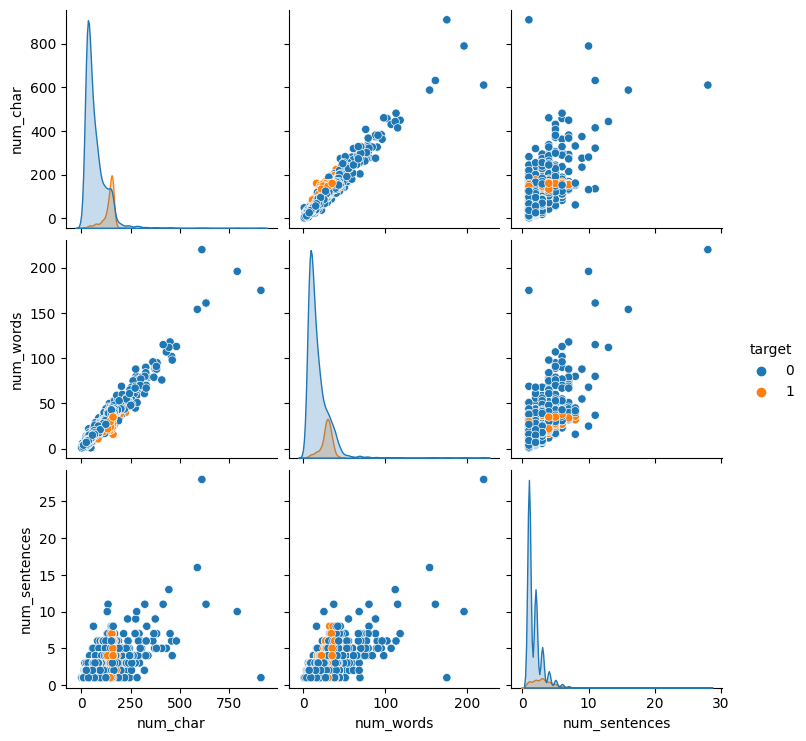

In [25]:
sb.pairplot(maindf,hue='target')

C:\Users\akash\AppData\Local\Temp\ipykernel_39288\2449963734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(maindf.corr(),annot=True)


<AxesSubplot: >

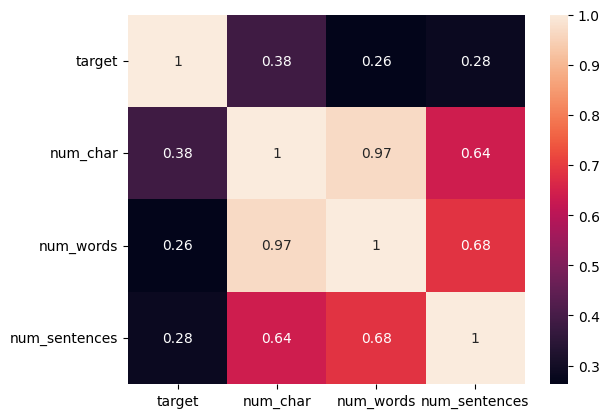

In [26]:
sb.heatmap(maindf.corr(),annot=True)

# DATA PREPROCESSING
lower case <br>
tokenization<br>
removing speacial characters<br>
removing stop words and punctuation <br>
stemming()<br> 


In [27]:
def transform_text(text):
    text = text.lower() #to convert all the text to lower case 
    text = nltk.word_tokenize(text) #segregating each word with space and returning it in form of list 

    # now since we have achieved list till now so we start a loop to remove special character from the list of text 
    y = []    
    for i in text:
        if i.isalnum(): # use isalnum()
            y.append(i)
            # print(y)

    # again running a loop 
    # text = y --> do not copy list like this it wont work do cloning since list is mutable data type

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # now making loop for stemming 
    # cloning
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    

In [28]:
# example of word tokenizing and also to lower case 
# transform_text('Hi how are you') 

# alpha num example the special character is removed
# transform_text('* heyy %% no *')

# stopwords example 
# transform_text('hey are you dancing in room or hall')



In [29]:
from nltk.corpus import stopwords
nltk.download('stopwords') # if you get lookup error just do this 
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
#STEMMING

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

# example 
transform_text('I love playing football in rain what about you fam ? ')

'love play footbal rain fam'

In [32]:
maindf['text'][20]
transform_text('Is that seriously how you spell his name?')

'serious spell name'

In [33]:
maindf['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [34]:
maindf['transformed_text'] = maindf['text'].apply(transform_text)

In [35]:
maindf.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud
wc = WordCloud(min_font_size=10, background_color='white')


In [37]:
# get target column where msz is spam and extract the new column and getting the string and concatenating it on space  for SPAM
spam_wc = wc.generate(maindf[maindf['target'] == 1]['transformed_text'].str.cat(sep=" "))

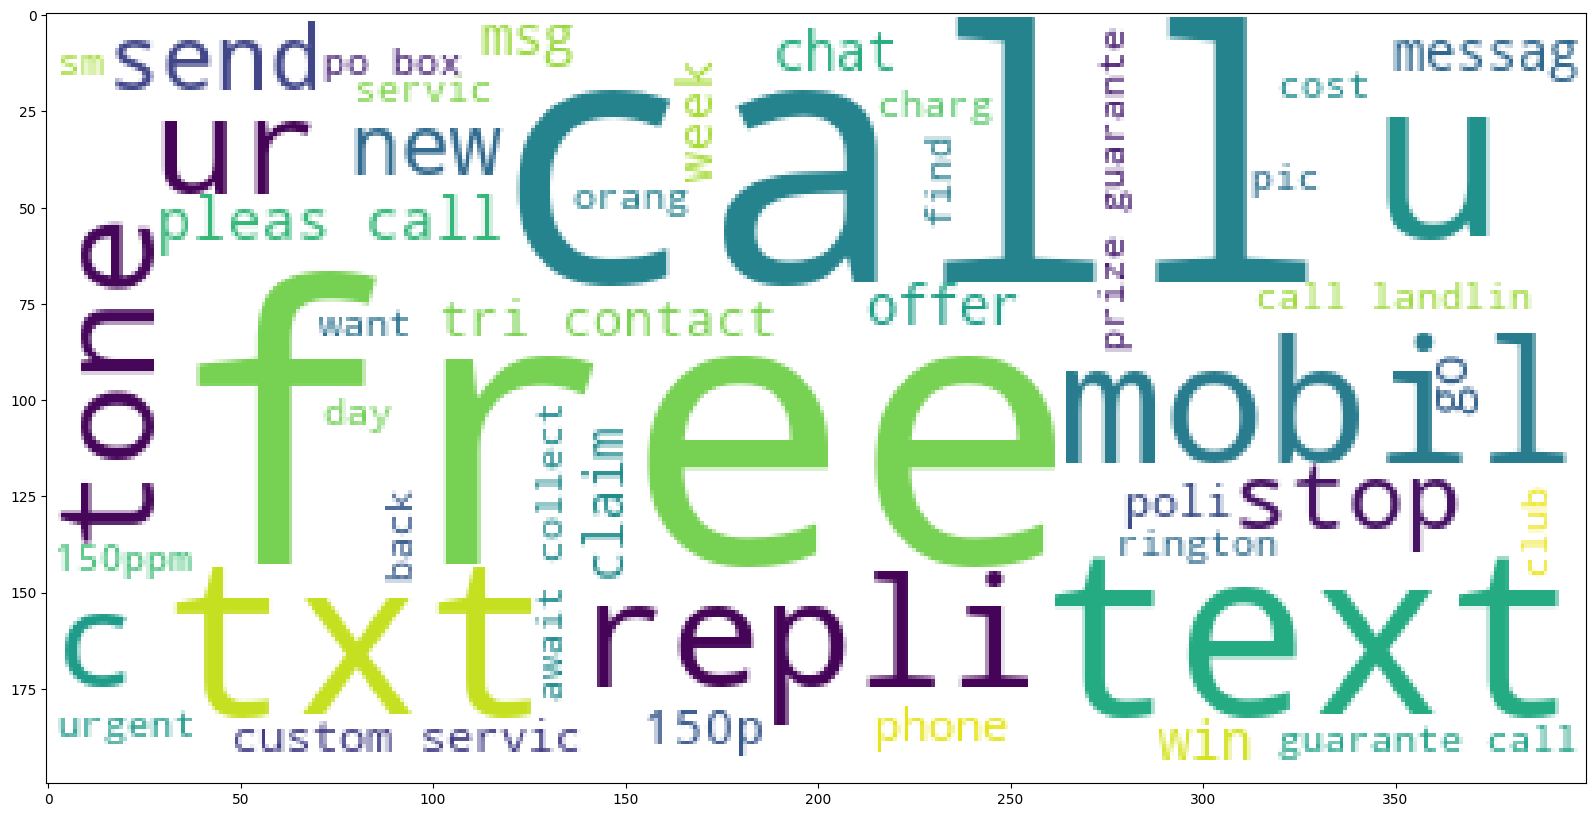

In [38]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

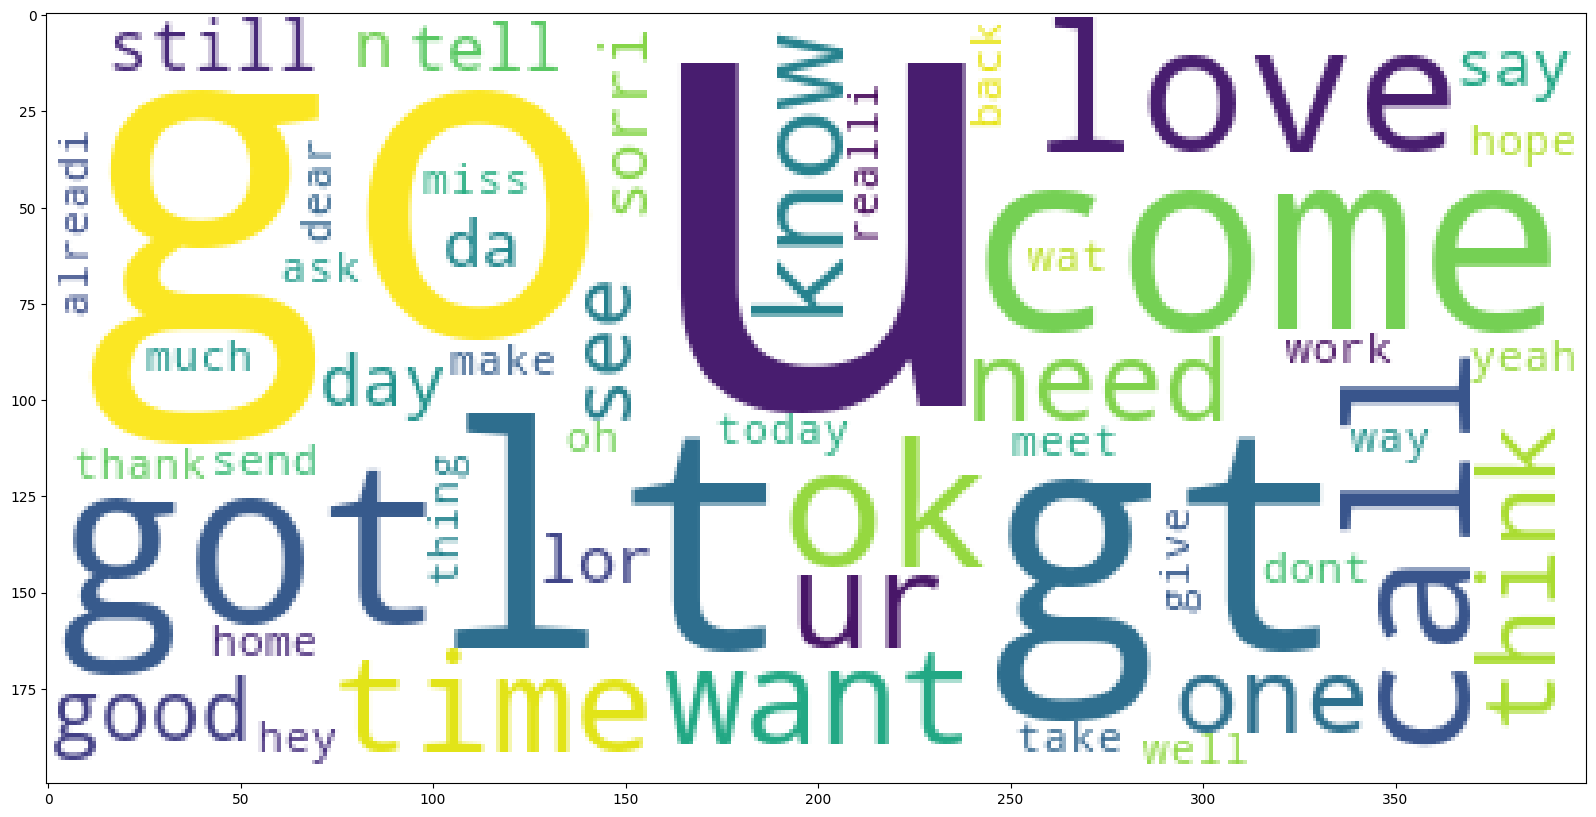

In [39]:
# get target column where msz is spam and extract the new column and getting the string and concatenating it on space  for HAM
ham_wc = wc.generate(maindf[maindf['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)

In [40]:
# since the wordcloud has its visual representation but to understand more clearly we can use the code below 
spam_word_collection = []
for msg in maindf[maindf['target'] == 1]['transformed_text'].tolist():
    for word in msg.split(): 
        # print(word)
        spam_word_collection.append(word)


In [41]:
spam_word_collection

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [42]:
len(spam_word_collection)

9939

In [43]:
# # importing a library to count the words 
# from collections import Counter
# Counter(spam_word_collection).most_common(30)

# from collections import Counter
# import seaborn as sb
# plt.figure(figsize=(12,10))
# sb.barplot(pd.DataFrame(Counter(spam_word_collection).most_common(30))[0],pd.DataFrame(Counter(spam_word_collection).most_common(30))[1])
# plt.xticks(rotation="vertical")
# plt.show()


In [44]:
# you can do same for ham just change 1 to 0 

# MODEL BUILDING

In [45]:
# naeve bayes bcoz it performs efficiently on textual data
# bag of words - most frequent words column (it will vectorize the data)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [46]:
# tfidf vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(maindf['transformed_text']).toarray()
y = maindf['target'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)

In [47]:
X = cv.fit_transform(maindf['transformed_text']).toarray()


In [48]:
X.shape

(5169, 6708)

In [49]:
y = maindf['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)


In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [52]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [53]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
 
# accuracy is not an reliable feature since data is imbalance

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [54]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [55]:
# keeping mnb with tfidf

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [57]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
    
train_classifier(svc,X_train,y_train,X_test,y_test)
(0.9729206963249516, 0.9741379310344828)
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9284332688588007
Precision -  0.7580645161290323
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9235976789168279
Precision -  0.9154929577464789
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [58]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
5,RF,0.971954,1.000000
8,ETC,0.977756,0.991453
10,xgb,0.974855,0.974576
4,LR,0.970986,0.973684
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
7,BgC,0.962282,0.915966
3,DT,0.923598,0.915493
2,NB,0.964217,0.834437


In [59]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.977756
3,xgb,Accuracy,0.974855
4,LR,Accuracy,0.970986
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,BgC,Accuracy,0.962282
8,DT,Accuracy,0.923598
9,NB,Accuracy,0.964217


In [60]:
# import pickle 
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))